In [1]:
import numpy as np # کار کردن با ماتریس
from gym import Env
from gym.spaces import Box , Discrete # دیسکریت برای اکشن اسپیس و باکس برای استیتها
import random
import pandas as pd
import math
from datetime import datetime
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

In [19]:
dataF = pd.read_excel('Book3.xlsx')
data_test = pd.read_excel('train_database.xlsx')

In [3]:
class CustomEnv(Env):

    def __init__(self): # برای مقداردهی اولیه
        
        self.action_space = Discrete(3) # 3 تا عمل داریم
        # T1(0)  T2(1)  T3(2)
        self.observation_space = Discrete(20)


In [4]:
# ایجاد یک شی از محیطی که ساختیم
env = CustomEnv()

In [122]:
# تعریف متغیرها
student_number = 0

# برای یادگیری
total_epochs = 0
episodes = 50000

# تعریف پارامترهای الگوریتم
alpha = 0.2 # learning rate
gamma = 0.8 # discount factor
epsilon = 0.01 # exploration rate
epsilon_decay = 0.9999
Q_values_per_episode = []
Q = np.zeros([env.observation_space.n, env.action_space.n])
Q

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [106]:
# برای تعیین سطح دانش اموز
# مرحله ترین
def determining_studen_level(student_number):
    
    timee = dataF.at[student_number , 'time_in_min']
    # -----------------------------------------------------------
    commands = dataF.at[student_number , 'num_commands']
    solution_display = dataF.at[student_number , 'solution_displ']
    submit = dataF.at[student_number , 'num_submitted_answers']
    answer =  dataF.at[student_number , 'answer']
    complete = completed_in_time = dataF.at[student_number , 'completed_in_time']
    
    studen_level = (commands + complete + answer ) / timee

    if solution_display == 0:
        studen_level = int((studen_level * 0.75) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level

    elif solution_display == 1:
        studen_level = int((studen_level * 1) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level


In [107]:
def determining_studen_level_test(student_number):
    
    timee = data_test.at[student_number , 'time_in_min']
    # -----------------------------------------------------------
    commands = data_test.at[student_number , 'num_commands']
    solution_display = data_test.at[student_number , 'solution_displ']
    submit = data_test.at[student_number , 'num_submitted_answers']
    answer =  data_test.at[student_number , 'answer']
    complete = completed_in_time = data_test.at[student_number , 'completed_in_time']
    
    studen_level = (commands + complete + answer ) / timee

    if solution_display == 0:
        studen_level = int((studen_level * 0.75) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level

    elif solution_display == 1:
        studen_level = int((studen_level * 1) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level


In [123]:
# تعیین ریوارد هر عمل
def get_reward(student_num):
    commands = dataF.at[student_num , 'num_commands'] # 1
    complete = completed_in_time = dataF.at[student_num , 'completed_in_time'] # 0
    solution_display = dataF.at[student_num , 'solution_displ']
    answer =  dataF.at[student_num , 'answer']
    # if answer == 1 and solution_display == 1
    if answer == 1: #F
        reward = 15
        return reward
    else: # T
        reward = -5
        return reward

In [124]:
# update Q-table with database
# -------------------------------------------------phase 1---------------------------------------------
def update_Qtable():
    for student_num in range(0,2000):
        DSL = determining_studen_level(student_num) # 1
        task_variant = dataF.at[student_num , 'task_variant'] # 1
        
        reward = get_reward(student_num)
        
        for i in range(0,4):
            for j in range(3):
                if DSL == i+1 and task_variant == j+1:
                    Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[i+1]) - Q[i,j])
       
    # -------------------------------------------------phase 2---------------------------------------------
    
    for student_num in range(2000,4000):
        DSL = determining_studen_level(student_num) # 1
        task_variant = dataF.at[student_num , 'task_variant'] # 1
        
        reward = get_reward(student_num)
        d =1
        t=1 
        for i in range(4,8):
    
            for j in range(3):
                if DSL == d and task_variant == j+1:
                    Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[i+1]) - Q[i,j])
            d+=1
       
    # -------------------------------------------------phase 3---------------------------------------------
    
    for student_num in range(4000,6000):
        DSL = determining_studen_level(student_num) # 1
        task_variant = dataF.at[student_num , 'task_variant'] # 1
        
        reward = get_reward(student_num)
        d =1 
        for i in range(8,12):
    
            for j in range(3):
                if DSL == d and task_variant == j+1:
                    Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[i+1]) - Q[i,j])
            d+=1
       
    # -------------------------------------------------phase 4---------------------------------------------
    
    for student_num in range(6000,8000):
        DSL = determining_studen_level(student_num) # 1
        task_variant = dataF.at[student_num , 'task_variant'] # 1
        
        reward = get_reward(student_num)
        d =1 
        for i in range(12,16):
    
            for j in range(3):
                if DSL == d and task_variant == j+1:
                    Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[i+1]) - Q[i,j])
            d+=1
       
    # -------------------------------------------------phase 5---------------------------------------------
    
    for student_num in range(8000,10000):
        DSL = determining_studen_level(student_num) # 1
        task_variant = dataF.at[student_num , 'task_variant'] # 1
        
        reward = get_reward(student_num)
        d =1 
        for i in range(16,20):
    
            for j in range(3):
                if DSL == d and task_variant == j+1:
                    if i != 19:
                        Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[i+1]) - Q[i,j])
    
                    elif i == 19:
                        Q[i,j] = Q[i,j] + alpha * (reward + gamma * np.max(Q[19]) - Q[i,j])
            d+=1
            

In [125]:
update_Qtable()
Q

array([[44.26846082,  0.        , 24.26846082],
       [36.58557603,  0.        , 16.58554857],
       [26.98197004,  0.        ,  6.5254273 ],
       [14.99840493,  0.        ,  0.        ],
       [37.32559112, 25.47193028, 30.41988169],
       [32.14678144, 26.02618361, 30.35739869],
       [19.40979068, 16.27239128, 21.55445249],
       [14.9975077 ,  5.4       , 14.88931954],
       [39.09248614, 34.90224891, 32.5445748 ],
       [27.51690578, 33.42818527, 26.88965349],
       [22.41826757, 21.81414274, 14.41801799],
       [14.99049262, 14.34029302, 10.0848    ],
       [38.70625888, 36.73293997, 23.38250007],
       [34.72133203, 29.92818099, 29.22054231],
       [25.04089276, 21.11396148, 14.18700307],
       [14.97098578, 14.97098578,  7.32      ],
       [29.87483272, 25.63274486, 19.91222037],
       [21.02431263, 15.70576431, 16.69728041],
       [ 8.88544   ,  3.9408    ,  0.        ],
       [ 5.88      ,  0.        ,  0.        ]])

total_epochs: 1948034
episodes: 50000
Average timesteps taken: 38.96068
epsilon: 6.73626261060335e-05 

Q-table after train with databese:

 [[75.         60.63484576 60.67345531]
 [75.         60.58399945 60.45993147]
 [75.         60.66049968 60.64101091]
 [75.         60.65423871 60.69072942]
 [75.         60.65020096 60.68626571]
 [75.         60.60623115 60.67445418]
 [60.61181883 60.62174847 75.        ]
 [75.         60.63867633 60.57967534]
 [75.         60.68992484 60.64036768]
 [60.5076913  75.         60.63682055]
 [75.         60.61178201 60.60551303]
 [75.         60.57372591 60.66555473]
 [75.         60.6276779  60.39092856]
 [75.         60.68869451 60.63957667]
 [75.         60.65995767 60.58583908]
 [75.         60.33263568 60.6737698 ]
 [75.         60.62602003 60.64984156]
 [75.         60.68083589 60.635848  ]
 [75.         60.6833528  60.68883141]
 [75.         60.64810599 60.64514859]]


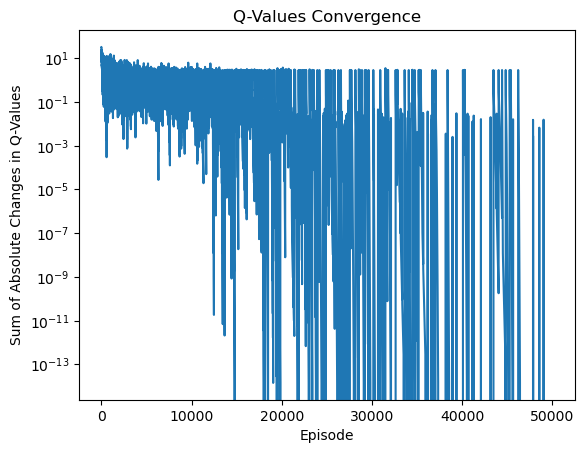

In [126]:
for episode in range(0 , episodes):
    epochs = 0 # tedad marahel- hamoon count dar marhale ghabli
    state = 0
    epsilon = epsilon * epsilon_decay #decay step
    
    
    while state != 20:

        if np.random.rand() < epsilon:
            #exploration option
            reward = 0.7
            action = env.action_space.sample()
            if state != 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state+1]) - Q[state, action])
                epochs += 1
            elif state == 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state]) - Q[state, action])
                epochs += 1
            
        else:
            #exploitation option
            action = np.argmax(Q[state])
            reward = 15
            if state != 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state+1]) - Q[state, action])
                epochs += 1
            elif state == 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state]) - Q[state, action])
            epochs += 1

        state += 1
        
    total_epochs += epochs

    # ذخیره Q-table در هر اپیزود
    Q_values_per_episode.append(Q.copy())

# محاسبه تغییرات در مقادیر Q-table
Q_deltas = []

for i in range(1, episodes):
    Q_delta = np.sum(np.abs(Q_values_per_episode[i] - Q_values_per_episode[i - 1]))
    Q_deltas.append(Q_delta)


print("total_epochs: {}".format(total_epochs))
print("episodes: {}".format(episodes))
print("Average timesteps taken: {}".format(total_epochs/episodes))
print("epsilon: {} \n".format(float(epsilon)))
print(f'Q-table after train with databese:\n\n {Q}')


# رسم نمودار همگرایی
plt.plot(Q_deltas)
plt.xlabel('Episode')
plt.ylabel('Sum of Absolute Changes in Q-Values')
plt.title('Q-Values Convergence')
plt.yscale('log')
plt.show()



In [127]:
# ارزیابی کلی برنامه
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

test_user_number = 120
y_true = []
y_pred = []

for i in range(test_user_number):
    dsl = determining_studen_level_test(i)
    finding_phase = data_test.at[i, 'phase']
    task = data_test.at[i, 'task_variant']
    
    for phase in range(5):
        if finding_phase == phase + 1:
            for level in range(4):
                if dsl == level + 1:
                    state = 4 * phase + level
                    action = np.argmax(Q[state])
                    y_true.append(task)
                    y_pred.append(action + 1)


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'\nConfusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}')

Accuracy: 74.17%
Precision: 0.63
Recall: 0.74
F1 Score: 0.68

Confusion Matrix:
[[89  7  0]
 [17  0  0]
 [ 7  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.93      0.85        96
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         7

    accuracy                           0.74       120
   macro avg       0.26      0.31      0.28       120
weighted avg       0.63      0.74      0.68       120



C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parspooya\anaconda3

In [128]:
# برای تست برنامه
stu_num = 0
num = 0
test_user_number = 120
k = 0
percent = 0

for i in range(test_user_number):
    dsl = determining_studen_level_test(i)
    finding_phase = data_test.at[i , 'phase']
    task = data_test.at[i , 'task_variant']
    
    
    for i in range(5):
        if k == 20:
            break
        if finding_phase == i+1:
            for j in range(4):
                if dsl == j+1:
                    k = 4 * i + j
                    action = np.argmax(Q[k])
                    print(f'student = {stu_num} --- phase = {finding_phase} --- level = {dsl} --- new task = {action+1} - {task} = old task')
                    if (action+1) == task:
                        percent +=1
    
    stu_num += 1

print(f'\ncorrect : {percent} of {test_user_number} --- wrong : {test_user_number - percent} of {test_user_number}')
print (f'new / total = {(percent / test_user_number) * 100} %')

student = 0 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 1 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 2 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 3 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 4 --- phase = 1 --- level = 1 --- new task = 1 - 3 = old task
student = 5 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 6 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 7 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 8 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 9 --- phase = 1 --- level = 1 --- new task = 1 - 1 = old task
student = 10 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 11 --- phase = 1 --- level = 2 --- new task = 1 - 3 = old task
student = 12 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 13 --- phase = 1 --- level = 1 --- new task = 1 - 1

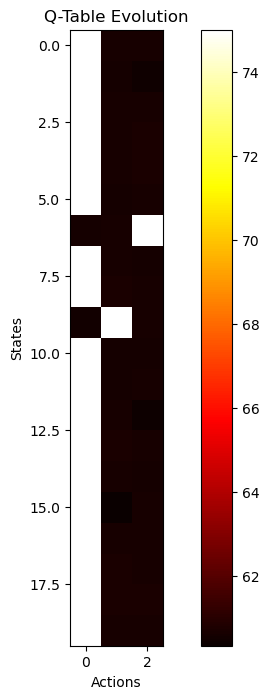

In [129]:
# نمودار تکامل جدول کیو

import matplotlib.pyplot as plt

# Q-values of each state-action pair over time
plt.figure(figsize=(10, 8))
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Actions')
plt.ylabel('States')
plt.title('Q-Table Evolution')
plt.show()


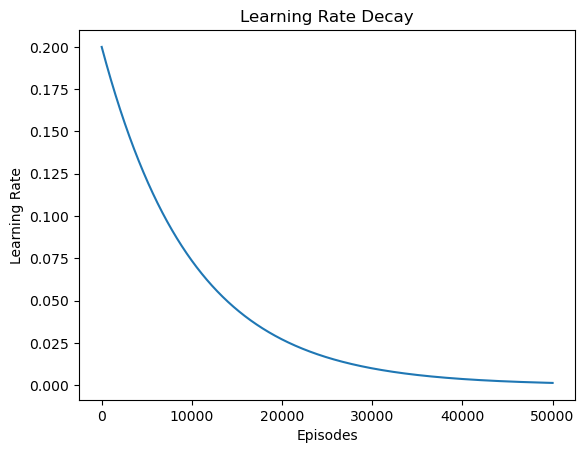

In [130]:
# نمودار نرخ یادگیری
learning_rates = [alpha * (epsilon_decay ** i) for i in range(episodes)]

plt.plot(learning_rates)
plt.xlabel('Episodes')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay')
plt.show()


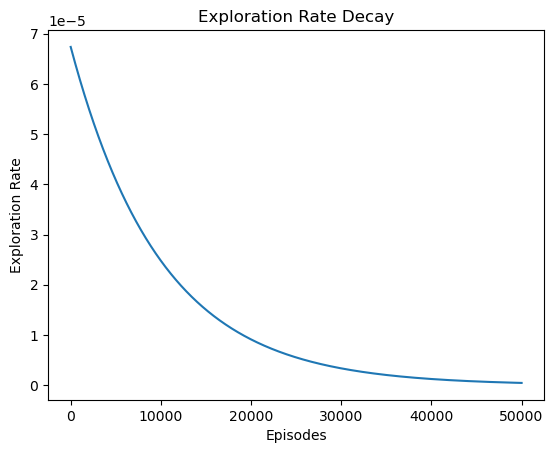

In [136]:
exploration_rates = [epsilon * (epsilon_decay ** i) for i in range(episodes)]

plt.plot(exploration_rates)
plt.xlabel('Episodes')
plt.ylabel('Exploration Rate')
plt.title('Exploration Rate Decay')
plt.show()
